<a href="https://colab.research.google.com/github/Amrit1799/Cognitive-Analysis/blob/main/ca_lab6_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


**Reading the dataset and cleaning it.**

In [ ]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Calculating the columns having null values.**


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Dropping the rows where there are null values**

In [ ]:
data = data.dropna(subset = ['Age','Embarked'])

**Since the column cabin has a lot of null values so drop it.**

In [ ]:
data=data.drop(columns = ['Cabin'])

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


**Since name and some columns do not have any correlation to survive so they are dropped.**

In [ ]:
data = data.drop(['Name','Embarked','Ticket'],axis = 1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


**Converting categorical data into numeric**

In [ ]:
list1 = ['Sex']
for column in list1:
    data[column] = data[column].astype('category')
data = pd.get_dummies(data = data, columns = list1)
data = data.astype('float64')


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0


**Visualisation**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Visualising the correlation in the form of heatmap**

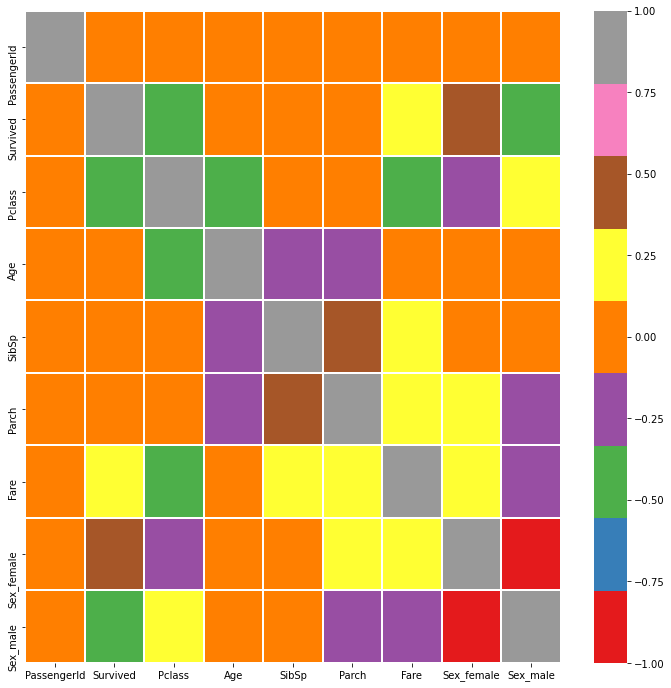

In [ ]:
fig, ax=plt.subplots(figsize=(12,12))
cor=data.corr().round(2)
sns.heatmap(cor,cmap="Set1",linewidth=1.0)

**Count plot for the number of people survived.   0~ Survived   1~Dead**

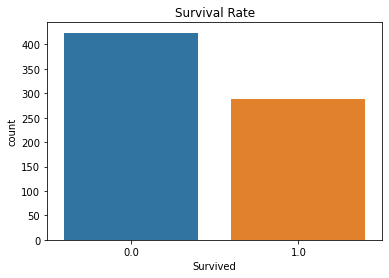

In [ ]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x=data['Survived'], data=data)
plt.title("Survival Rate")
plt.show()

**Histogram For Age**

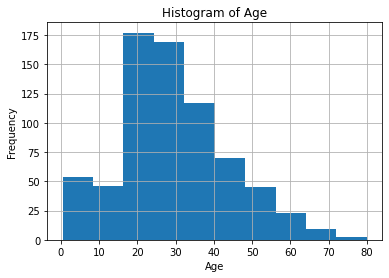

In [ ]:
data['Age'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

**Scatter plot between Age and Fare**

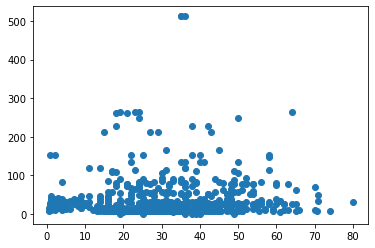

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data['Age'], data['Fare'])

**Bar Chart been the class and the passenger's age**

<BarContainer object of 712 artists>

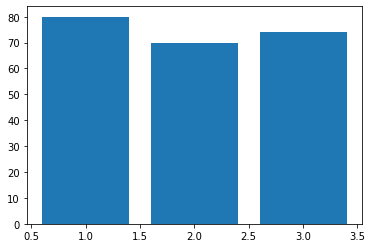

In [ ]:
fig, ax = plt.subplots()
ax.bar(data['Pclass'], data['Age'])

**After cleaning and Visualisation, heading forward to train the model**

In [ ]:
X_train = data.iloc[:,data.columns != 'Survived']
Y_train = data['Survived']

In [ ]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
2,3.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0
4,5.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0


In [ ]:
Y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

![](http://)**Importing the Logistic Regression model from sklearn and Training the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

**Importing the test dataset and cleaning it like the test one.**

In [ ]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test = test.dropna(subset = ['Age'])
test=test.drop(['Cabin','Name','Ticket','Embarked'], axis =1)

In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [ ]:
list1 = ['Sex']
for column in list1:
    test[column] = test[column].astype('category')
test = pd.get_dummies(data = test, columns = list1)
test = data.astype('float64')

In [ ]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0


In [ ]:
X_test = test.iloc[:,test.columns != 'Survived']
Y_test = test['Survived']

**Predicting the survived column for the test dataset using the Logistic Regression model.**

In [ ]:
y_pred = logreg.predict(X_test)

**Accuracy of the Model**

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.79


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[363  61]
 [ 88 200]]


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       424
         1.0       0.77      0.69      0.73       288

    accuracy                           0.79       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712



**ROC Curve**

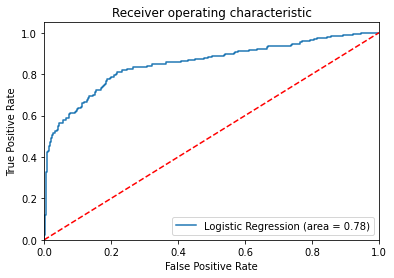

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()